# Import all necessary libraries

In [1]:
import pandas as pd

# Load training data

In [2]:
df = pd.read_csv('/home/abhishek/Documents/NLP/Blog/spam-ham-classifier/train.csv')

# Display data

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Delete all unnecessary columns and display data

In [4]:
del_columns = []
for col in df.columns:
    if col not in ['Id','LotArea','SalePrice']:
        del_columns.append(col)

In [5]:
df.drop(del_columns,axis = 1 , inplace=True)

In [6]:
df

,Id,LotArea,SalePrice
0,1,8450,208500
1,2,9600,181500
2,3,11250,223500
3,4,9550,140000
4,5,14260,250000
5,6,14115,143000
6,7,10084,307000
7,8,10382,200000
8,9,6120,129900
9,10,7420,118000


In [7]:
df['SalePrice'] = df['SalePrice']/1000

In [8]:
df

,Id,LotArea,SalePrice
0,1,8450,208.500
1,2,9600,181.500
2,3,11250,223.500
3,4,9550,140.000
4,5,14260,250.000
5,6,14115,143.000
6,7,10084,307.000
7,8,10382,200.000
8,9,6120,129.900
9,10,7420,118.000


# Prepare training data

In [9]:
from sklearn.model_selection import train_test_split

X = df['LotArea']
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Define regression model

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
        
def LinearRegression():
    model = Sequential()
    model.add(Dense(1, activation = 'linear', use_bias = True, input_dim = 1))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.1), loss = 'mean_squared_error', metrics = ['mae'])
    return model 

model = LinearRegression()

Using TensorFlow backend.


# Define callback

In [11]:
from tensorflow import keras

params_history = []
weights_history = []
bias_history = []

class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weight, bias = model.get_weights()
        B = bias[0] 
        W = weight[0][0]
        params = [W, B]
        params_history.append(params)
        weights_history.append(W)
        bias_history.append(B)
        
callback = MyCallback()

In [12]:
MODEL = model.fit(X_train, Y_train, epochs = 1000, batch_size = 128, verbose = False, callbacks=[callback])

In [13]:
df2 = pd.read_csv('/home/abhishek/Documents/NLP/Blog/spam-ham-classifier/test.csv')

In [14]:
df2.drop(del_columns,axis = 1 , inplace=True)

In [15]:
df2

,Id,LotArea
0,1461,11622
1,1462,14267
2,1463,13830
3,1464,9978
4,1465,5005
5,1466,10000
6,1467,7980
7,1468,8402
8,1469,10176
9,1470,8400


In [16]:
test = df2['LotArea']

output = model.predict(test)

In [17]:
%matplotlib inline

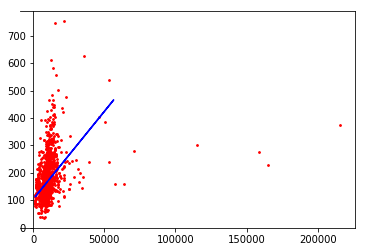

In [18]:
import matplotlib.pyplot as plt
import numpy as np

area = np.pi * 1**2

fig, ax = plt.subplots()

ax.scatter(X_train,Y_train,s = area, color = 'red')
ax.plot(test,output,'b')

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right']#.set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top']#.set_color('none')
ax.xaxis.tick_bottom()

plt.show()

In [19]:
weight_matrix,bias_matrix = model.get_weights()

In [20]:
W = weight_matrix[0][0]

In [21]:
B = bias_matrix[0]

# Result obtained from prediction

In [22]:
model_ans = model.predict([10000])

# Verifying if the returned params(weight + bias) is correct

# y = mx + c ~ y = Wx + B

# Result obtained from linear algebra

In [23]:
manual_ans = 10000*W + B

In [24]:
model_ans

array([[167.57013]], dtype=float32)

In [25]:
manual_ans

167.57013592869043

In [26]:
params_history[:5]

[[0.356422, -0.31622773],
 [0.30259308, -0.4584487],
 [0.26706544, -0.56527823],
 [0.22050707, -0.6675032],
 [0.14315349, -0.7551503]]

In [27]:
weights_history[:5]

[0.356422, 0.30259308, 0.26706544, 0.22050707, 0.14315349]

In [28]:
bias_history[:5]

[-0.31622773, -0.4584487, -0.56527823, -0.6675032, -0.7551503]

# Weight learned through iterations

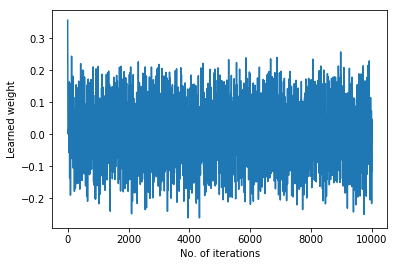

In [29]:
plt.xlabel("No. of iterations")
plt.ylabel("Learned weight")
plt.plot(weights_history)

# Bias learned through iterations

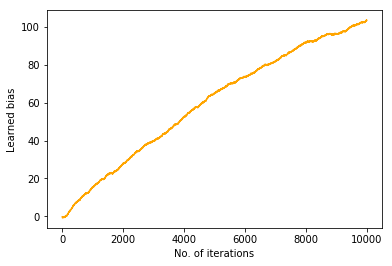

In [30]:
plt.xlabel("No. of iterations")
plt.ylabel("Learned bias")
plt.plot(bias_history, 'orange')

# Weight + Bias learned through iterations

## blue -> weight
## orange -> bias

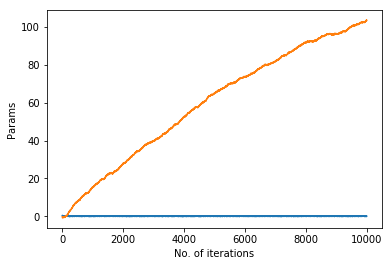

In [31]:
plt.xlabel("No. of iterations")
plt.ylabel("Params")
plt.plot(params_history)

In [32]:
output

array([[177.95319],
       [194.88486],
       [192.08746],
       ...,
       [231.58401],
       [170.39316],
       [165.18242]], dtype=float32)

In [33]:
df2['SalePrice'] = output

In [34]:
df2.drop(['LotArea'],axis = 1, inplace = True)

In [35]:
df2.to_csv('submission.csv', encoding = 'utf-8', index = False)

In [36]:
cost_function = MODEL.history['mean_absolute_error']

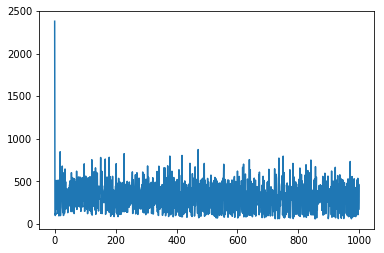

In [37]:
plt.plot(cost_function)

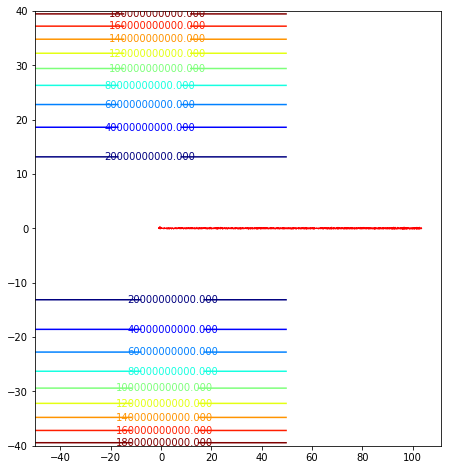

In [43]:
def costfunction(x,y,theta):
    
    #print(theta.shape)
    #print(y.shape)
    
    m = np.size(y)
    h = np.dot(x,theta)
    
    J = float(np.dot((h - y).T,(h - y))/(m*2));    
    return J;

XX = np.array(X_train.tolist())
YY = np.array(Y_train.tolist())

XX_1 = np.vstack((np.ones(len(XX)), XX)).T

#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-50,50,100),np.linspace(-40,40,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(XX_1, YY.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )

#Reshaping the cost values    
Z = zs.reshape(T0.shape)

anglesx = np.array(bias_history)[1:] - np.array(bias_history)[:-1]
anglesy = np.array(weights_history)[1:] - np.array(weights_history)[:-1]

fig = plt.figure(figsize = (16,8))

#Contour plot
ax = fig.add_subplot(1, 2, 2)
cp = ax.contour(T0, T1, Z, 10, cmap = 'jet')
ax.clabel(cp, inline=True, fontsize=10)
ax.quiver(bias_history[:-1], weights_history[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

In [40]:
XX_1

array([[1.000e+00, 7.862e+03],
       [1.000e+00, 7.420e+03],
       [1.000e+00, 1.080e+04],
       ...,
       [1.000e+00, 1.680e+03],
       [1.000e+00, 7.056e+03],
       [1.000e+00, 7.851e+03]])

In [42]:
YY

array([208.3, 132. , 139. , ..., 118. , 140. , 216.5])